# Challenge 4: Linear Splitting

## Linear Regression and Train/Test Split challenges
Name: Robert Fang
Date: Apr 20, 2019

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime 
import pickle
import seaborn as sns

%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [6]:
#Import CSV files, movies.csv
def get_movie_data(file_url):
    data = pd.read_csv(file_url, skiprows = 0)
    return data

df_movies = get_movie_data('2013_movies.csv')

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [8]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


##### Challenge 1 
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [9]:
def run_model(X, y):
    '''
    For a set of features and target X, y
    fit and validate a linear regression model, and report results
    '''
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    
    # score fit model on validation data
    val_score = lr_model.score(X, y)
    pred = lr_model.predict(X)
    val_score = lr_model.score(X, y)
    resid = y - pred
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    print(lr_model.coef_)
    return pred, resid

In [10]:
X = np.ones(100).reshape(-1,1).astype(int)

In [11]:
y = df_movies['DomesticTotalGross']

In [12]:
pred, resid = run_model(X,y)


Validation R^2 score was: 0.0
Feature coefficient results: 

[0.]


Text(0, 0.5, 'Predicted Total Domestic Sales')

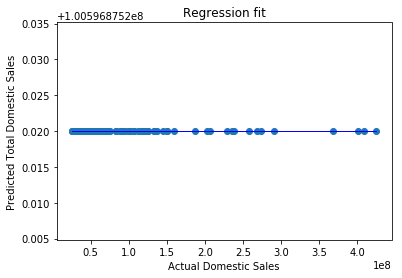

In [14]:
# See plot of y vs prediction
plt.scatter(y, pred)
plt.plot(y, pred, color='blue',linewidth=1)
plt.title("Regression fit")
plt.xlabel("Actual Domestic Sales")
plt.ylabel("Predicted Total Domestic Sales")

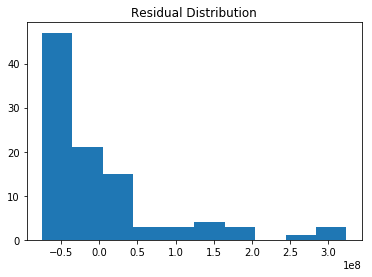

In [79]:
plt.hist(resid, bins=10)
plt.title("Residual Distribution")
plt.show()

##### OLS used only a constant term and should just return the intercept of the y when x is 0 and should be the same across for all x. Residuals appear to be a poisson distribution, those close to the intercept are 0 and those far from the y-intercept is magnitudes larger.

##### Challenge 2 
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [16]:
def run_model(X, y):
    '''
    For a set of features and target X, y
    fit and validate a linear regression model, and report results
    '''
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    
    # score fit model on validation data
    val_score = lr_model.score(X, y)
    pred = lr_model.predict(X)
    val_score = lr_model.score(X, y)
    resid = y - pred
    
    # report results
    print('\nValidation R^2 score was:',  val_score)
    print('\nIntercept was:', lr_model.intercept_)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
    return pred, resid

In [17]:
X1 = pd.DataFrame(X)

In [18]:
X1['Runtime']=df_movies['Runtime']

In [19]:
pred1, resid1 = run_model(X1,y)


Validation R^2 score was: 0.08564768236933162

Intercept was: -57246774.20138389
Feature coefficient results: 

0 : 0.00
Runtime : 1406054.24


Text(0.5, 0, 'Run Time')

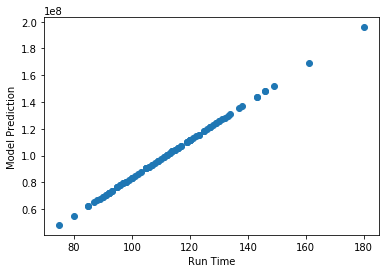

In [20]:
plt.scatter(X1['Runtime'],pred1)
plt.ylabel("Model Prediction")
plt.xlabel("Run Time")

##### We now have a univariate linear regression model using Run time, our R^2 improved slightly. Coefficient is the slope of 1.4mm per min of run time

Text(0.5, 0, 'Run Time')

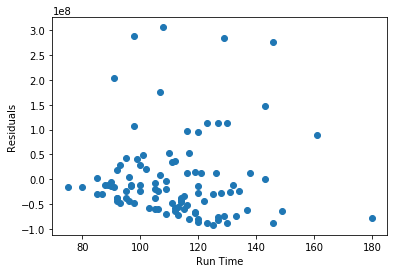

In [26]:
plt.scatter(X1['Runtime'],resid1)
plt.ylabel("Residuals")
plt.xlabel("Run Time")

##### Challenge 3 
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [93]:
X2 = X1.copy()

In [94]:
X2['Rating']=df_movies['Rating']

In [95]:
X2['Rating'].value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

In [96]:
pred2, resid2 = run_model(pd.get_dummies(X2, drop_first=True),y)


Validation R^2 score was: 0.21480483988134236

Intercept was: 91174180.41260147
Feature coefficient results: 

0 : 0.00
Runtime : 1657183.02
Rating_PG : -125646287.90
Rating_PG-13 : -174461046.34
Rating_R : -204781179.79


##### Note our intercept changed to $91.17mm and thee R-square improved with the inclusion of our categorical feature. As the Rating of the movie approaches R total Domestic sales falls by its coefficients.

##### Challenge 4 
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [97]:
X3 = X2.copy() 

In [98]:
X3['Budget'] = df_movies['Budget']

In [99]:
X3 = X3.fillna(0)

In [100]:
X3 = pd.get_dummies(X3, drop_first=True)

In [101]:
pred3, resid3 = run_model(X3,y)


Validation R^2 score was: 0.34298767325773905

Intercept was: 165426138.6923651
Feature coefficient results: 

0 : 0.00
Runtime : 963239.49
Budget : 0.61
Rating_PG : -187927471.13
Rating_PG-13 : -218645945.59
Rating_R : -223365652.96


##### Challenge 5 
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [102]:
# perform train/val split
X_train, X_val, y_train, y_val = train_test_split(X3, y, test_size=0.25, random_state=10)

In [103]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
pred = lr_model.predict(X_val)
val_score = lr_model.score(X_val, y_val)
resid = y_val - pred
print('\nValidation R^2 score was:', val_score)
for feature, coef in zip(X_val.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')


Validation R^2 score was: 0.24450247302013386
0 : 0.00
Runtime : 949237.46
Budget : 0.53
Rating_PG : -204893690.36
Rating_PG-13 : -214711982.83
Rating_R : -222279985.74


Text(0.5, 0, 'Prediction')

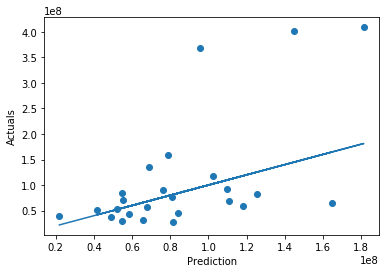

In [106]:
plt.scatter(pred,y_val)
plt.plot(pred,pred)
plt.ylabel("Actuals")
plt.xlabel("Prediction")